In [1]:
import torch
from torch.utils.data import DataLoader
from tqdm import tqdm
import numpy as np
from sklearn.metrics import accuracy_score, roc_auc_score
from torchinfo import summary
import torch.nn as nn
import argparse, os, json, sys
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from torch.utils.data import Dataset
import h5py
from EvalTools import *
sys.path.append("../model")
from PFINDataset import PFINDataset
from UQPFIN import UQPFIN as Model
from EvalTools import uncertainty_plot
import gc
import seaborn as sns
%env HDF5_USE_FILE_LOCKING=FALSE

env: HDF5_USE_FILE_LOCKING=FALSE


In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [3]:
#optional parameters to only evaluate certain models
optional_dataset = 'jetnet'
optional_tag = ''
results_dir = 'results/'
saved_model_loc = "../model/trained_models/"
saved_model_dict_loc = "../model/trained_model_dicts/"

result_files = sorted([f for f in os.listdir(results_dir) if optional_dataset in f and optional_tag in f
                      and "Ensemble" in f and '.h5' in f])
print('\n'.join(result_files))

RESULTS_UQPFIN_Ensemble_jetnet_baseline.h5
RESULTS_UQPFIN_Ensemble_jetnet_skiptop.h5
RESULTS_UQPFIN_Ensemble_jetnet_skiptwz.h5
RESULTS_UQPFIN_Ensemble_jetnet_skipwz.h5


In [7]:
for modelname in result_files:
    model_results = {}
    mname = modelname[15:-3]
    filename = os.path.join(results_dir, modelname)
    
    f = h5py.File(filename, "r")
    labels, preds, oods, probs, uncs, sums = f['labels'][:], f['preds'][:], f['oods'][:], f['probs'][:], f['uncs'][:], f['sums'][:]
    f.close()
    acc = accuracy_score(labels[~oods], preds[~oods])*100
    if "topdata" in mname:
        probs2=probs
    else:
        skiplabels = np.unique(labels[oods])
        probs2=np.delete(probs, skiplabels, 1)

    if probs2.shape[1] == 2:
        probs2 = probs2[:, 1]
    
    # misclassification detection vs anomaly detection
    if "baseline" in mname:
        oods = labels != preds
    
    this_file = os.path.join(saved_model_loc, modelname[8:-3])
    
    # Uncertainty
    auc = roc_auc_score(oods, uncs) * 100
    print("{} \t\t Accuracy: {:.2f}% \t AUROC: {:.2f}%".format(mname, acc, auc))

Ensemble_topdata_baseline 		 Accuracy: 93.66% 	 AUROC: 89.00%


Ensemble_jetnet_baseline


/tmp/ipykernel_118062/815984113.py:123: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.set_ticklabels([f'{int(tick / 1000)}k' for tick in tick_values])
/tmp/ipykernel_118062/815984113.py:124: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/tmp/ipykernel_118062/815984113.py:123: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.set_ticklabels([f'{int(tick / 1000)}k' for tick in tick_values])
/tmp/ipykernel_118062/815984113.py:124: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/tmp/ipykernel_118062/815984113.py:123: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.set_ticklabels([f'{int(tick / 1000)}k' for tick in tick_values])
/tmp/ipykernel_118062/815984113.py:124: UserWarning: This figure includes Axes that are not

Ensemble_jetnet_skiptop


/tmp/ipykernel_118062/815984113.py:108: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax  = plt.subplots(1, 2, figsize=(10,10), gridspec_kw={'width_ratios':[1,0.05], 'wspace': 0.1})
/tmp/ipykernel_118062/815984113.py:123: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.set_ticklabels([f'{int(tick / 1000)}k' for tick in tick_values])
/tmp/ipykernel_118062/815984113.py:124: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/tmp/ipykernel_118062/815984113.py:123: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.set_ticklabels([f'{int(tick / 1000)}k' for tick in tick_values])
/tmp/ipykernel_118062/815984113.py:124: 

Ensemble_jetnet_skiptwz


/tmp/ipykernel_118062/815984113.py:123: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.set_ticklabels([f'{int(tick / 1000)}k' for tick in tick_values])
/tmp/ipykernel_118062/815984113.py:124: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/tmp/ipykernel_118062/815984113.py:123: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.set_ticklabels([f'{int(tick / 1000)}k' for tick in tick_values])
/tmp/ipykernel_118062/815984113.py:124: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/tmp/ipykernel_118062/815984113.py:123: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.set_ticklabels([f'{int(tick / 1000)}k' for tick in tick_values])
/tmp/ipykernel_118062/815984113.py:124: UserWarning: This figure includes Axes that are not

Ensemble_jetnet_skipwz


/tmp/ipykernel_118062/815984113.py:123: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.set_ticklabels([f'{int(tick / 1000)}k' for tick in tick_values])
/tmp/ipykernel_118062/815984113.py:124: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/tmp/ipykernel_118062/815984113.py:123: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.set_ticklabels([f'{int(tick / 1000)}k' for tick in tick_values])
/tmp/ipykernel_118062/815984113.py:124: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/tmp/ipykernel_118062/815984113.py:123: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.set_ticklabels([f'{int(tick / 1000)}k' for tick in tick_values])
/tmp/ipykernel_118062/815984113.py:124: UserWarning: This figure includes Axes that are not

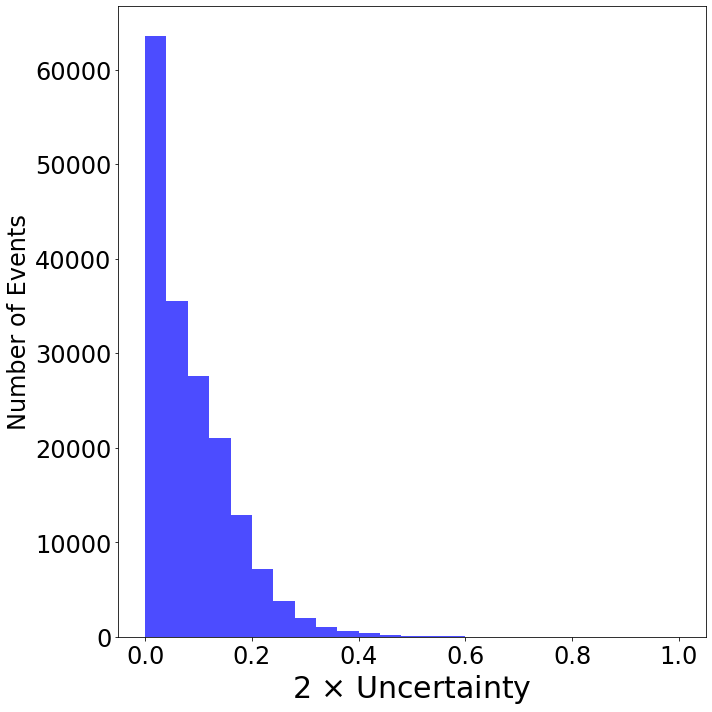

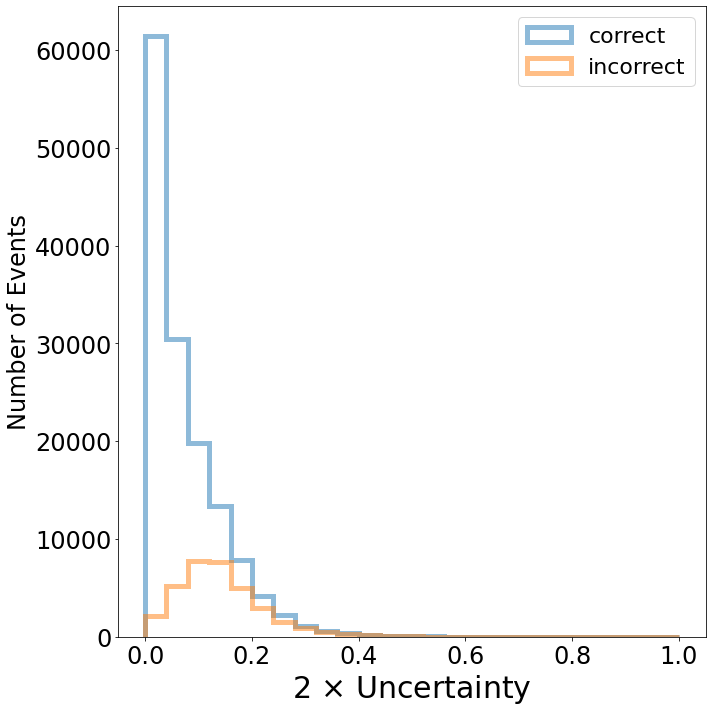

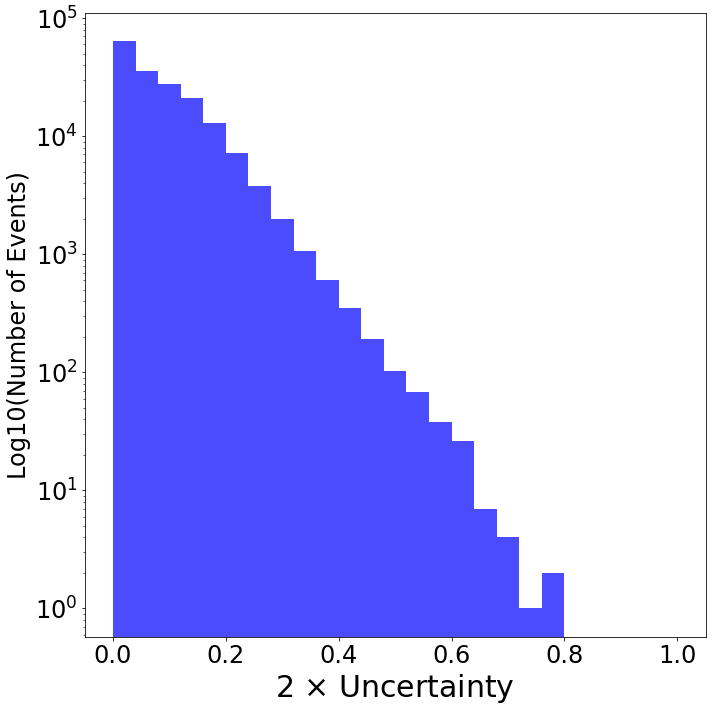

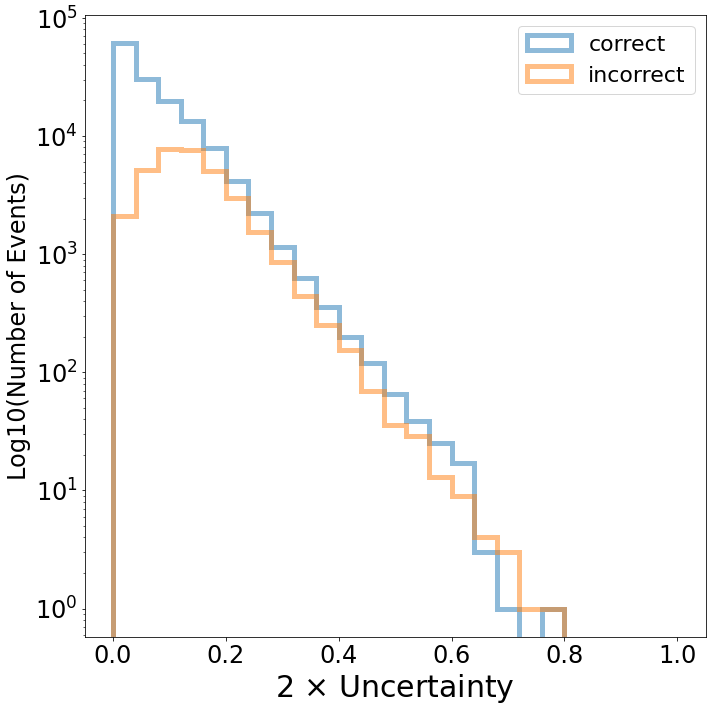

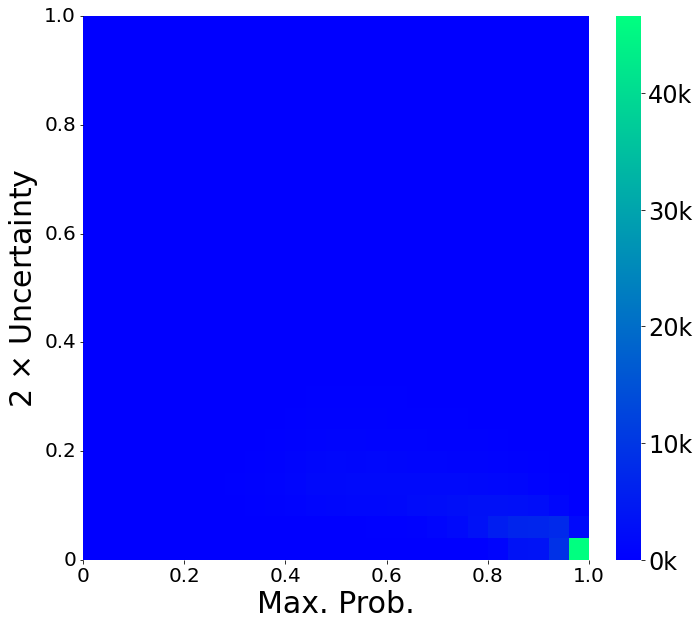

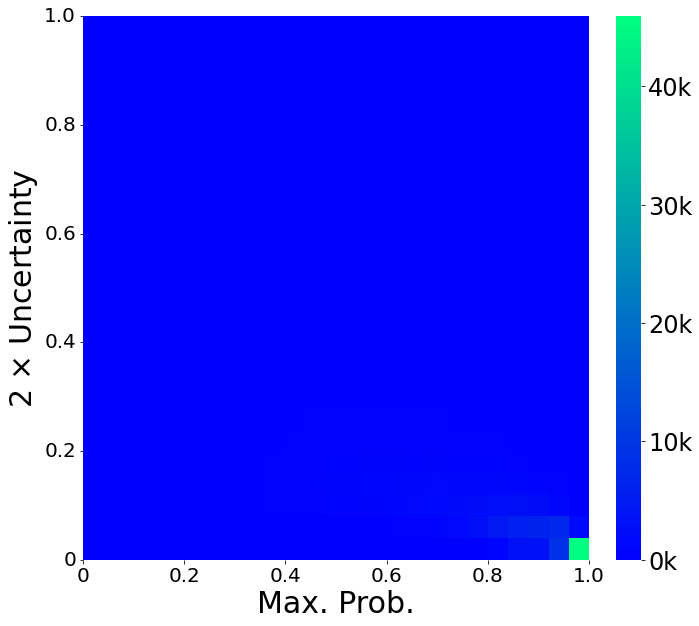

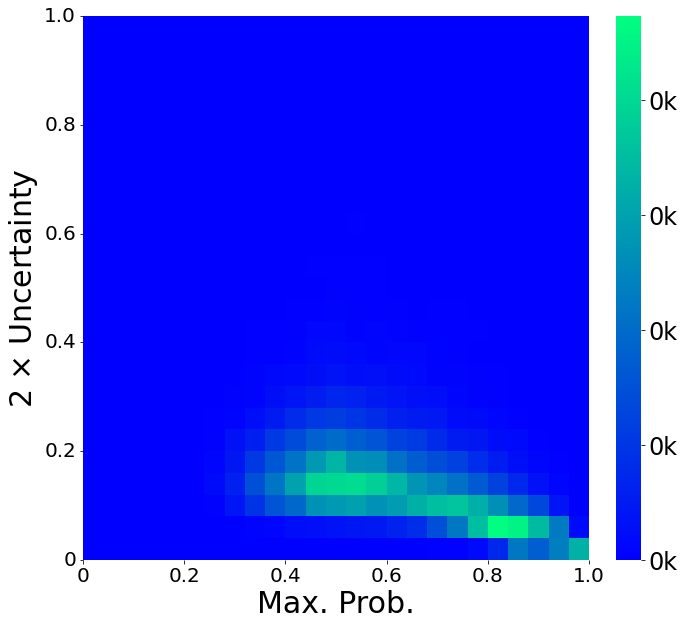

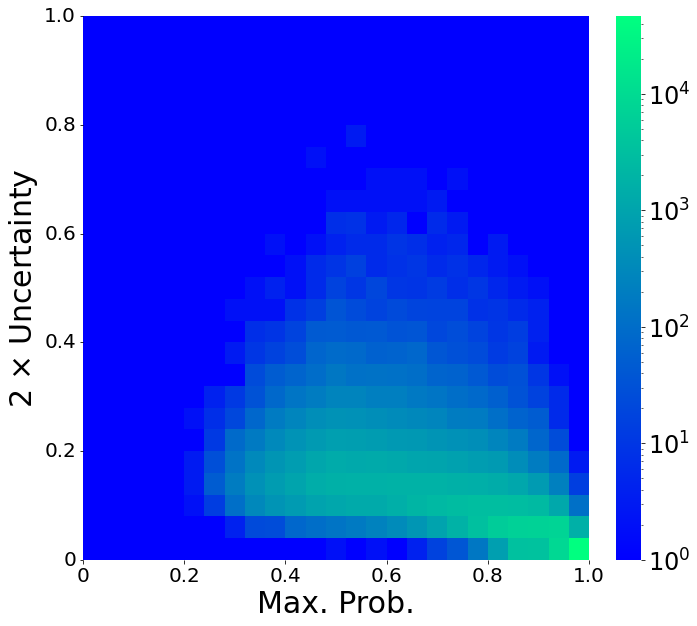

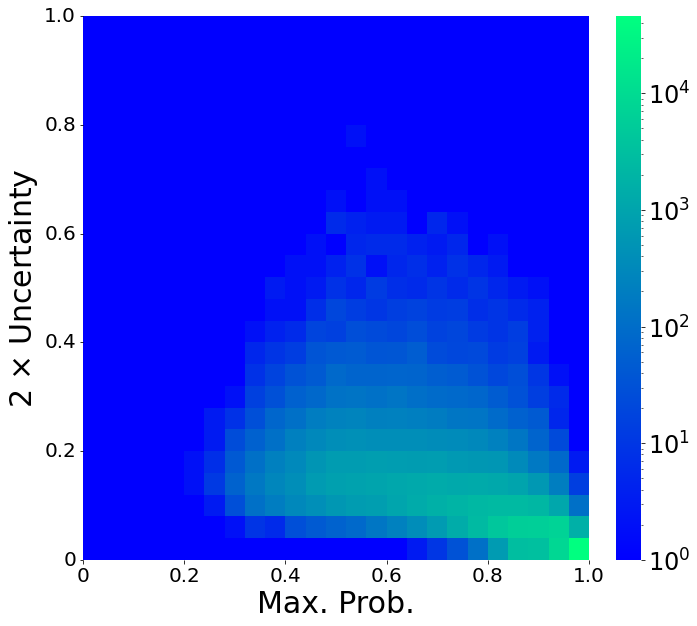

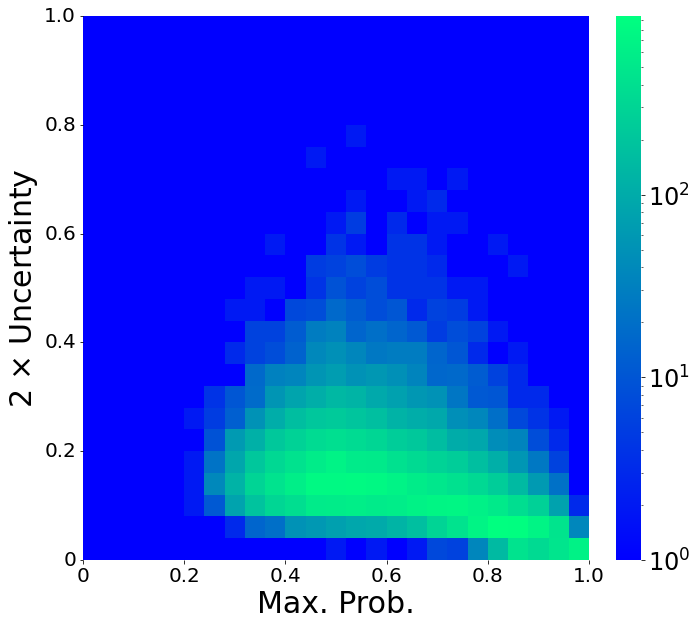

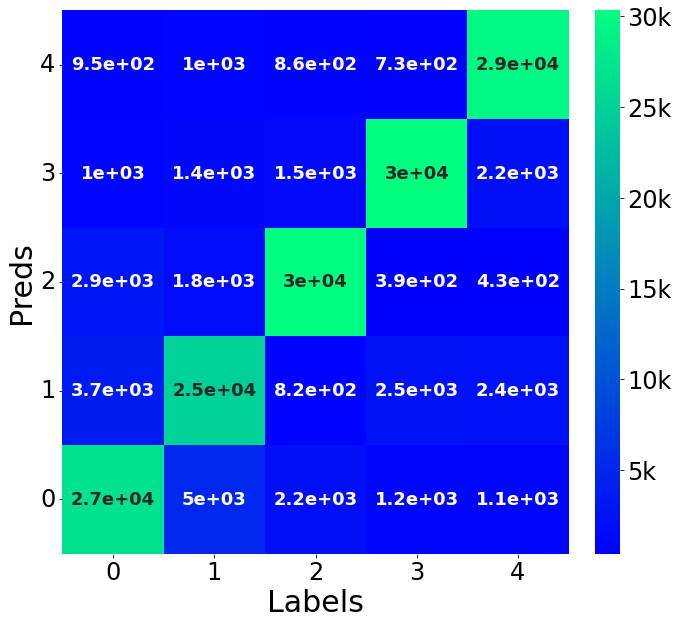

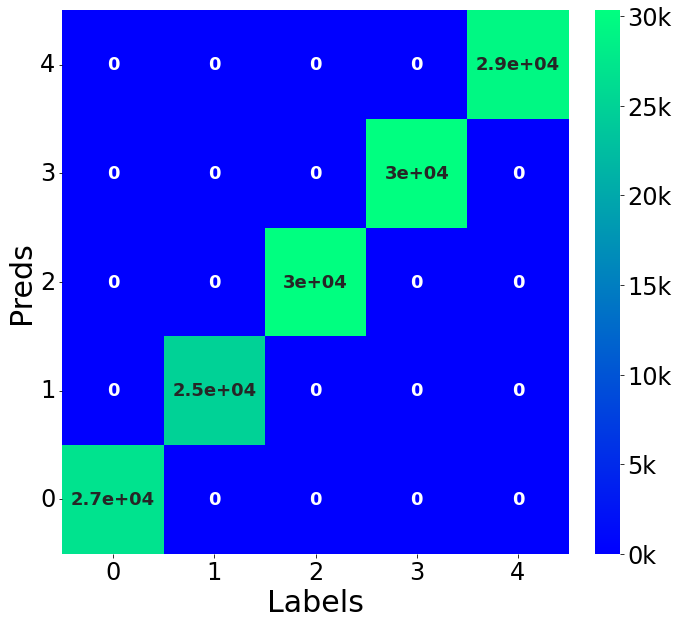

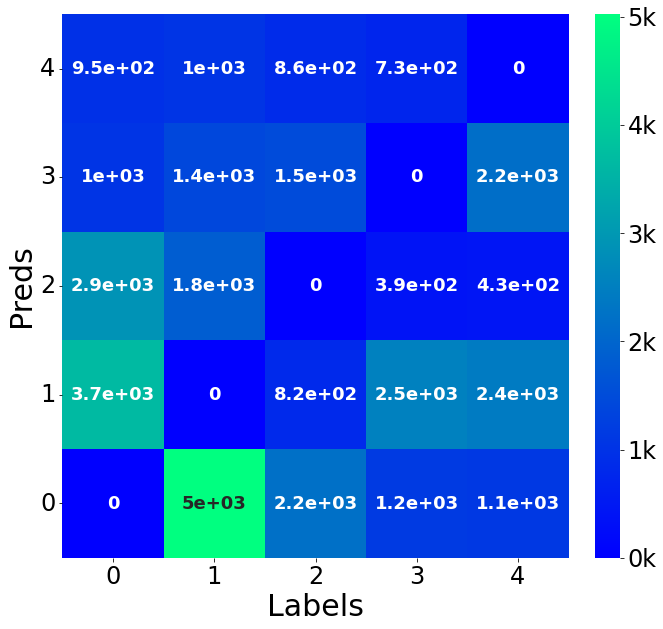

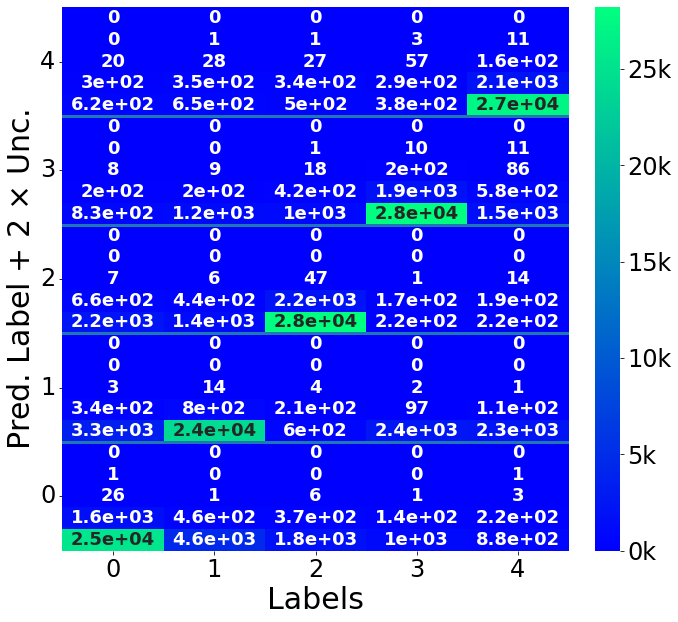

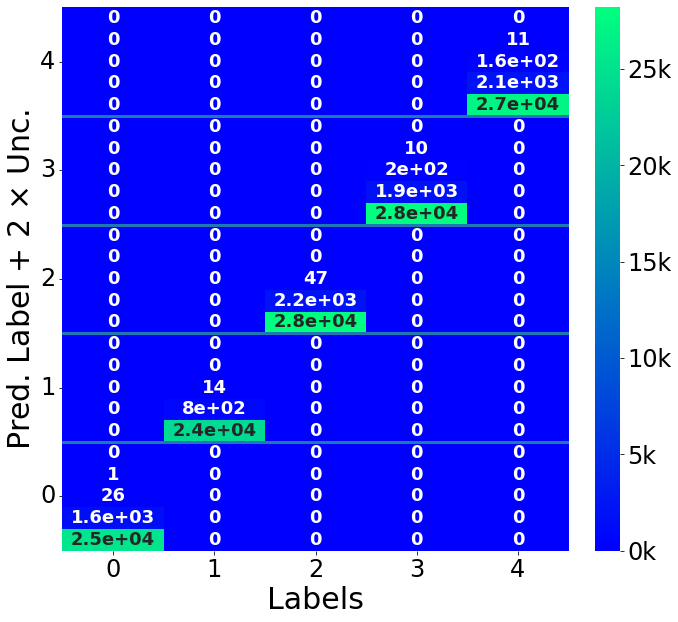

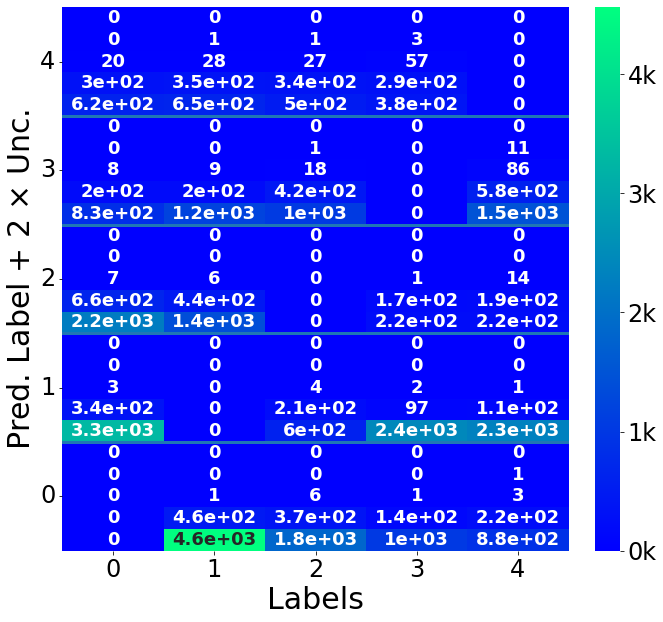

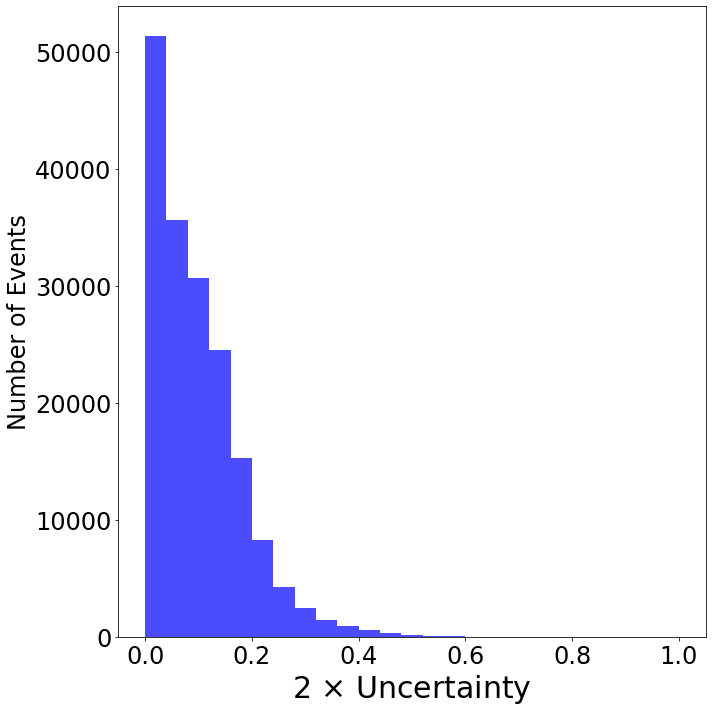

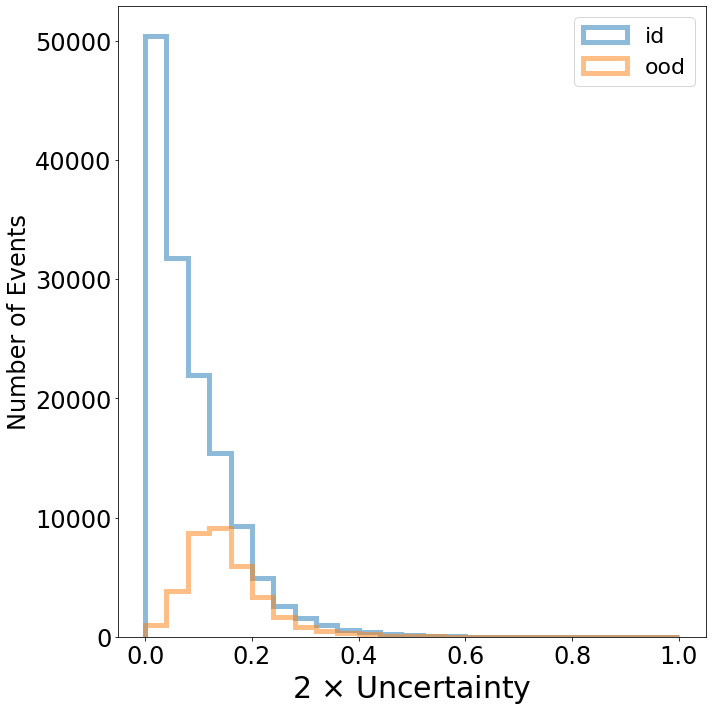

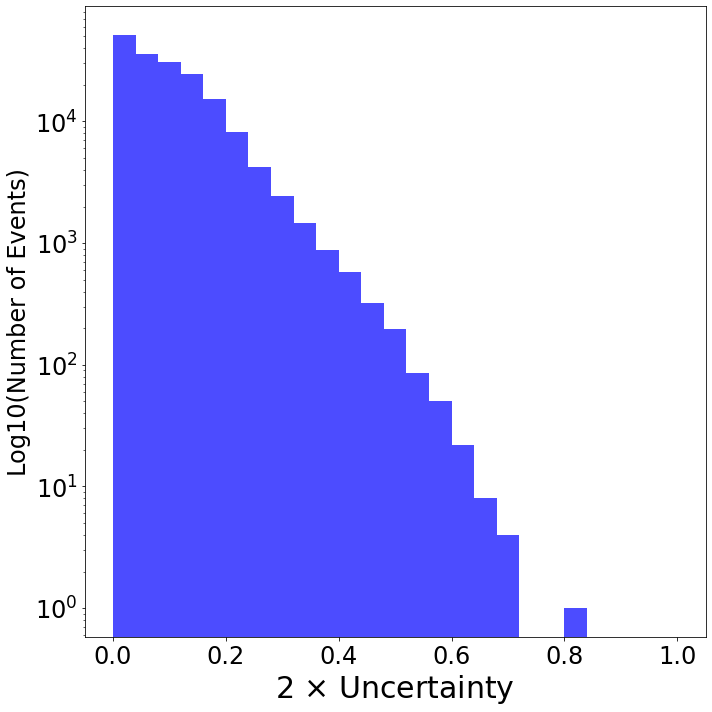

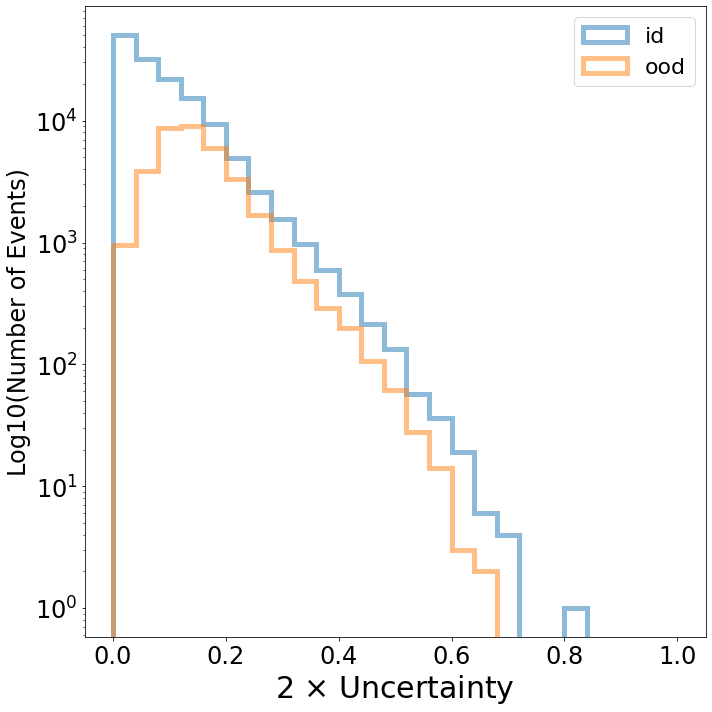

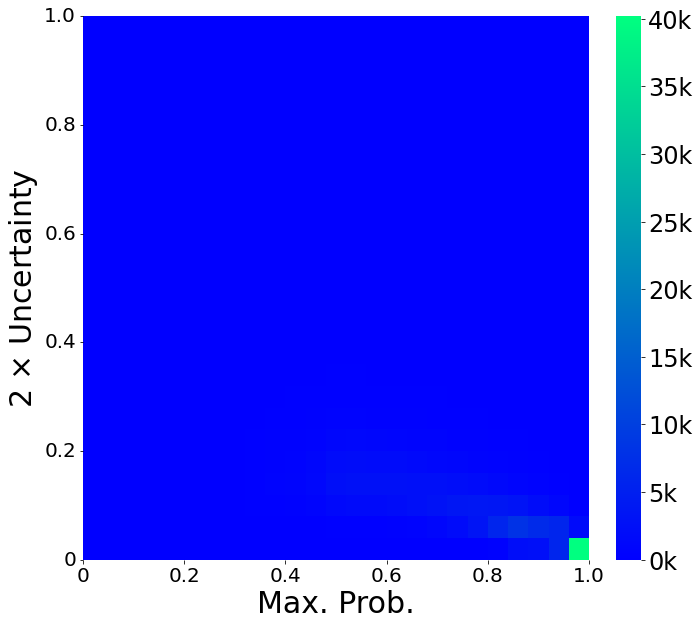

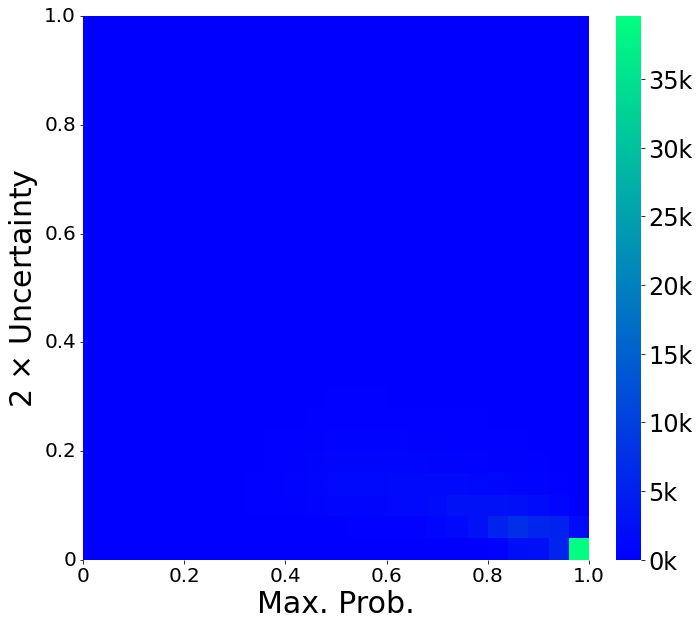

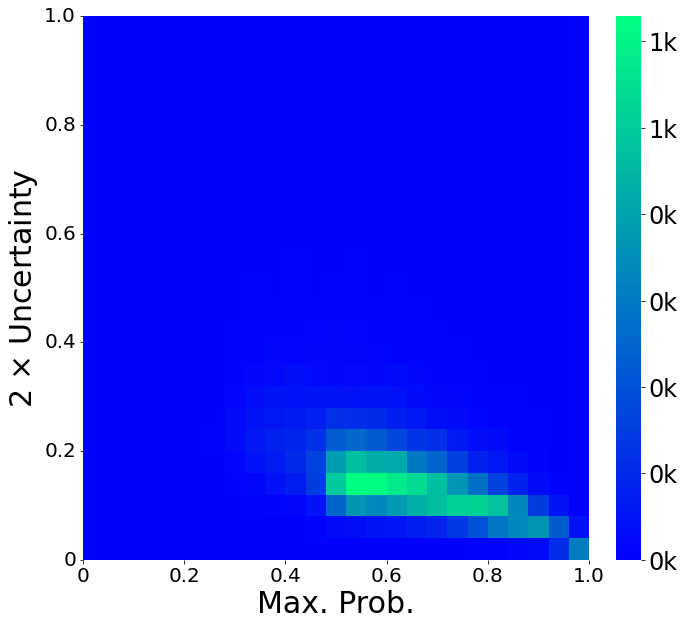

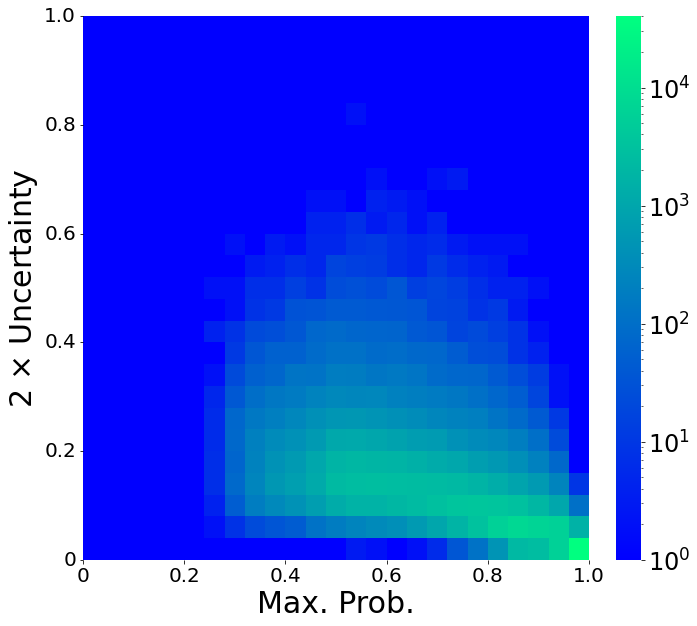

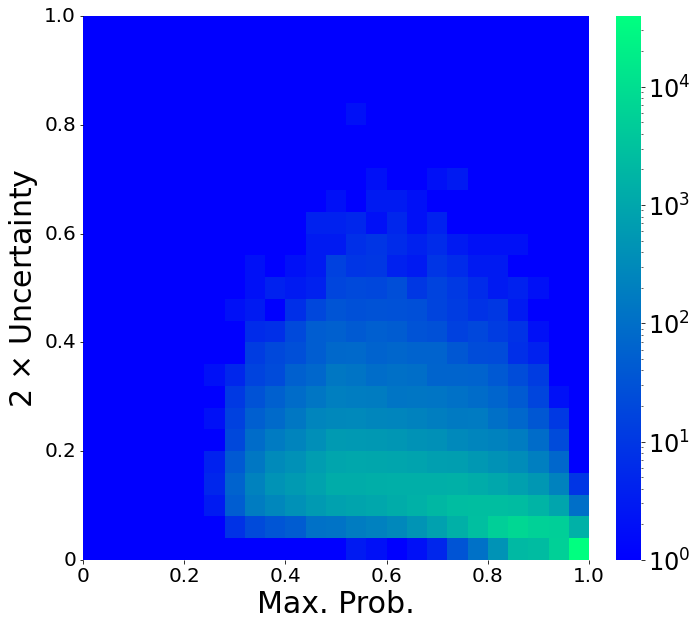

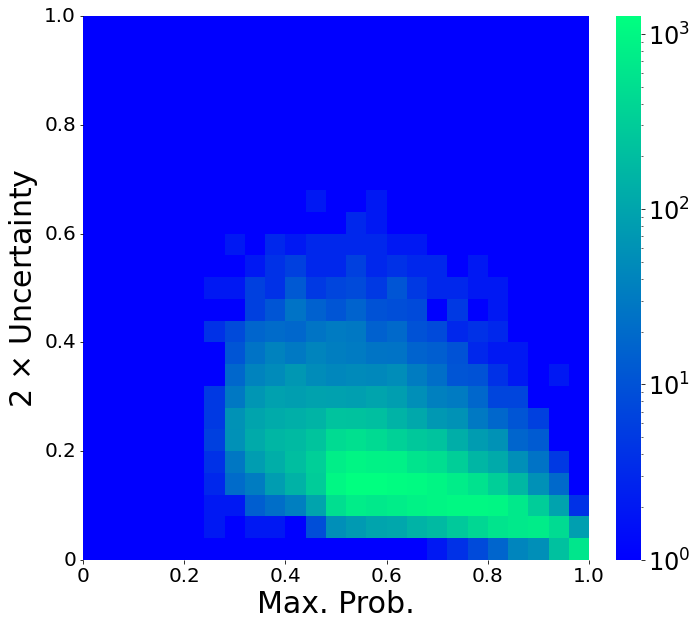

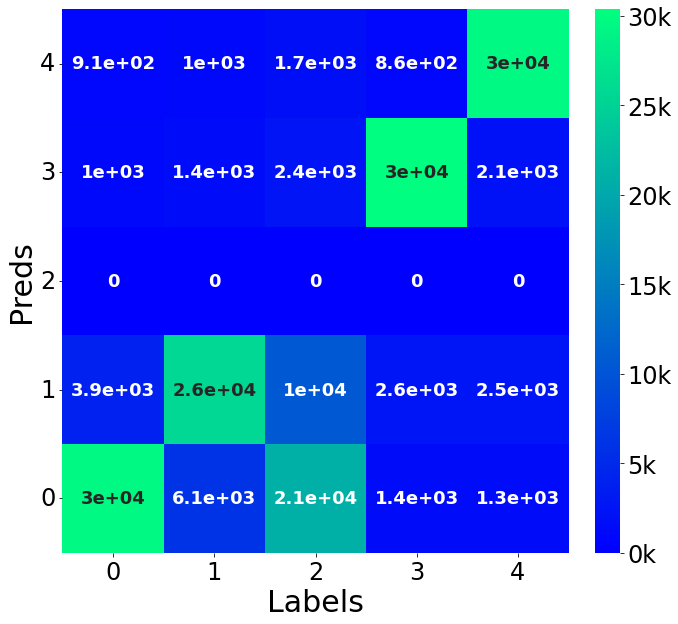

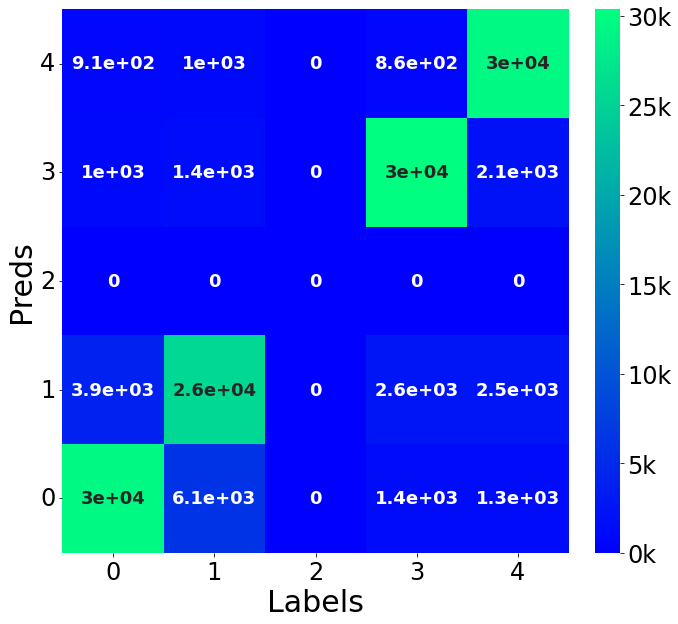

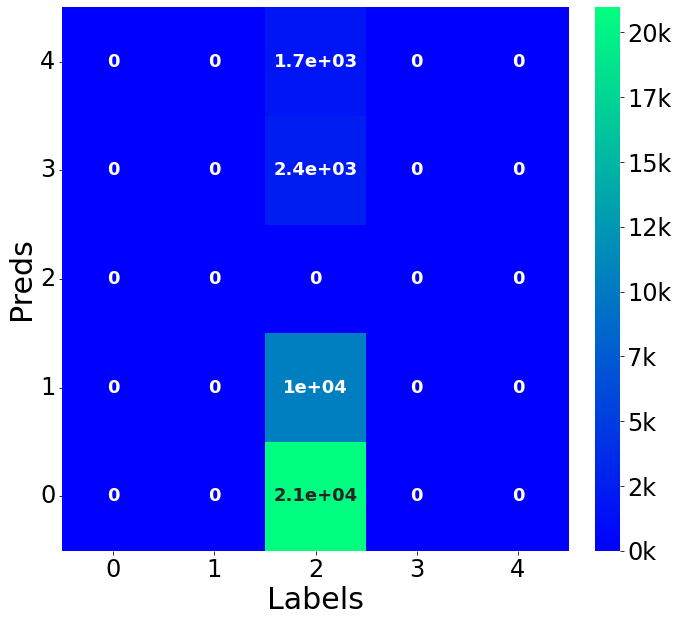

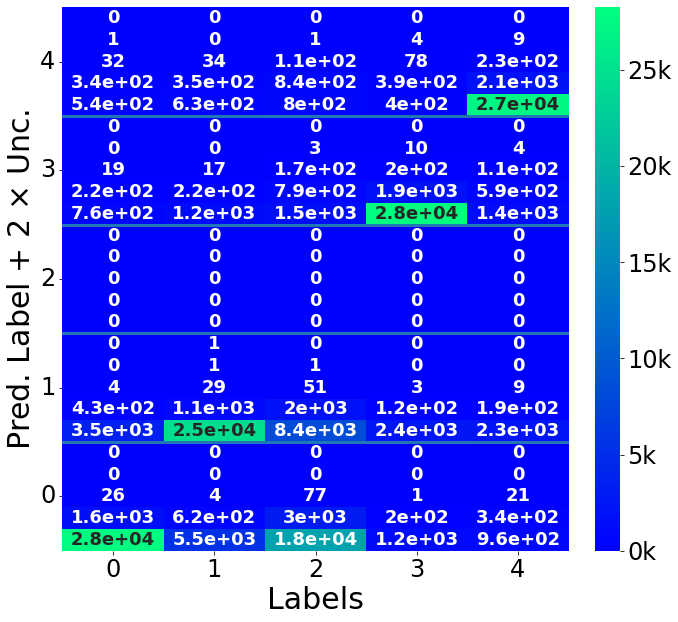

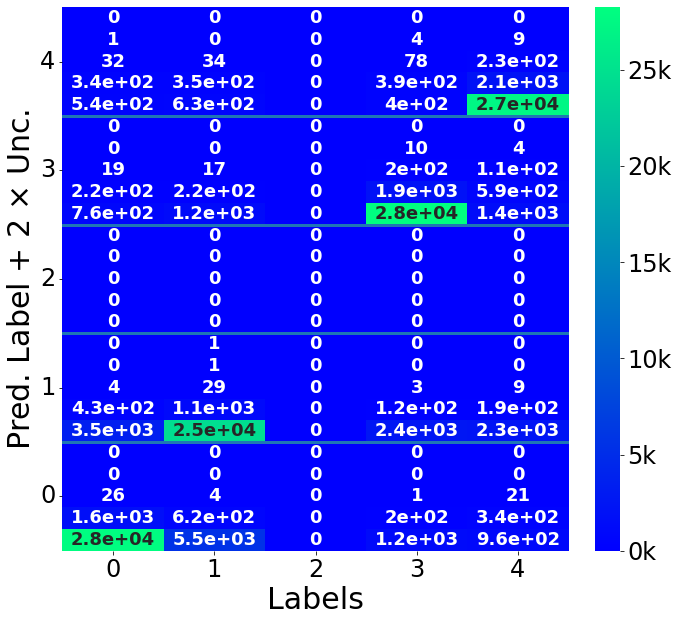

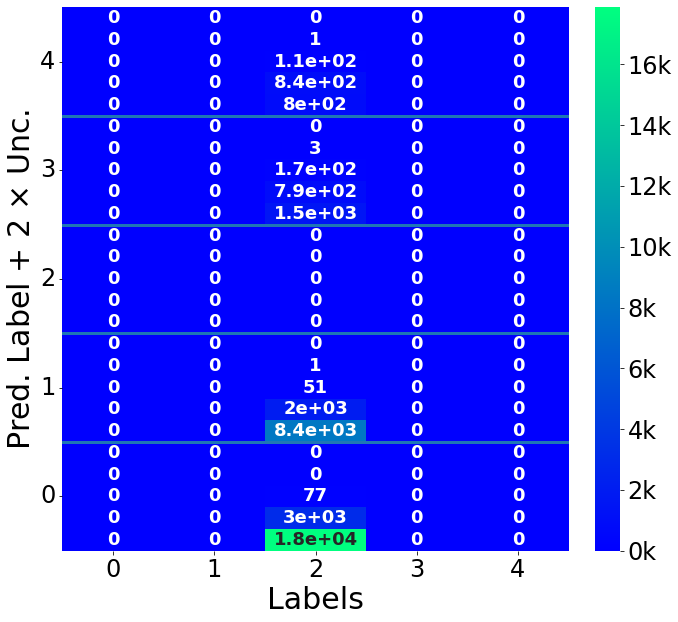

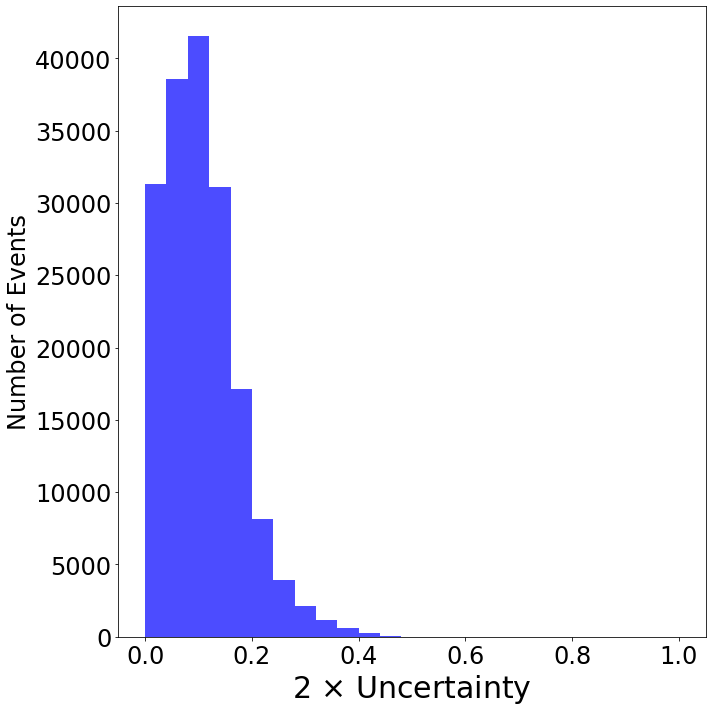

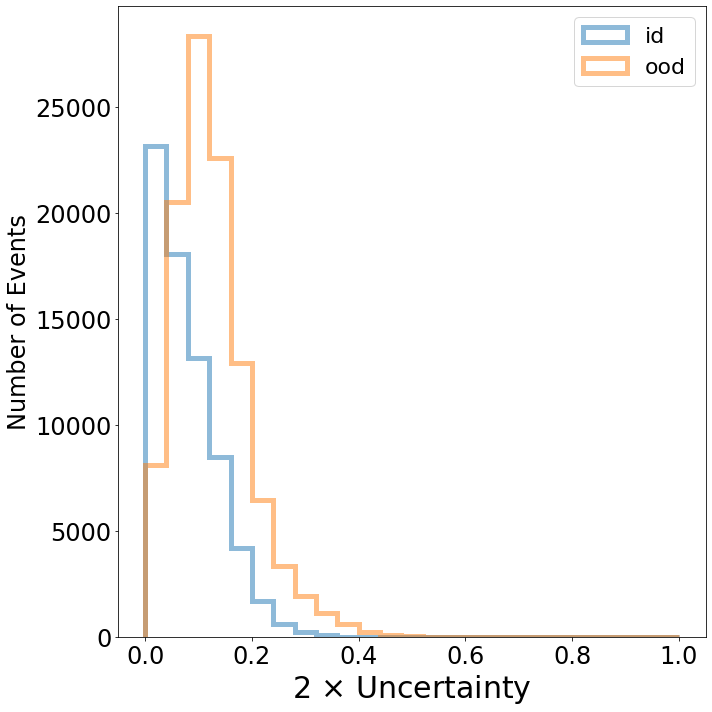

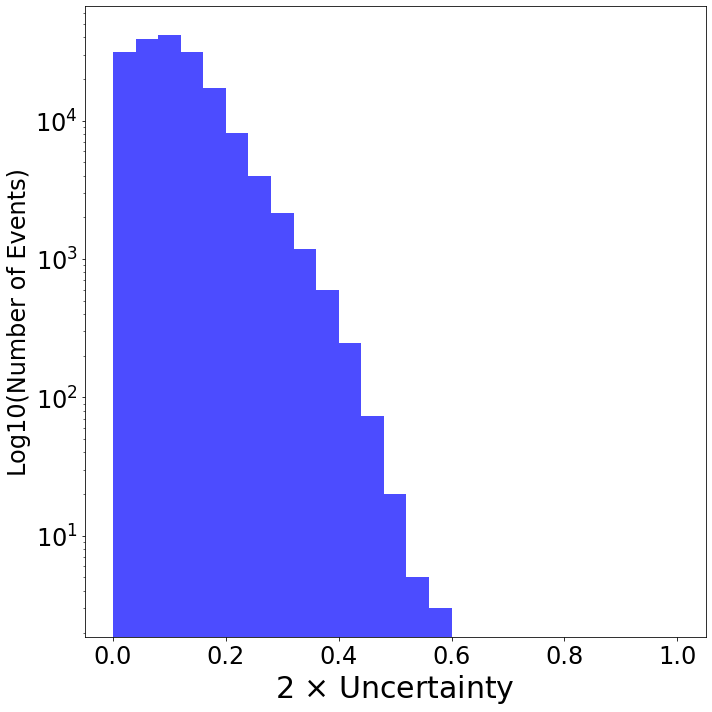

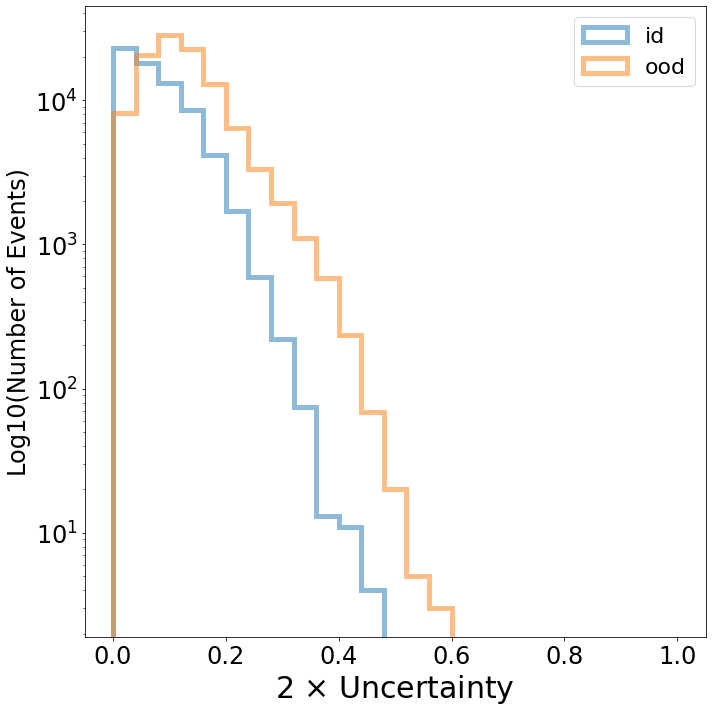

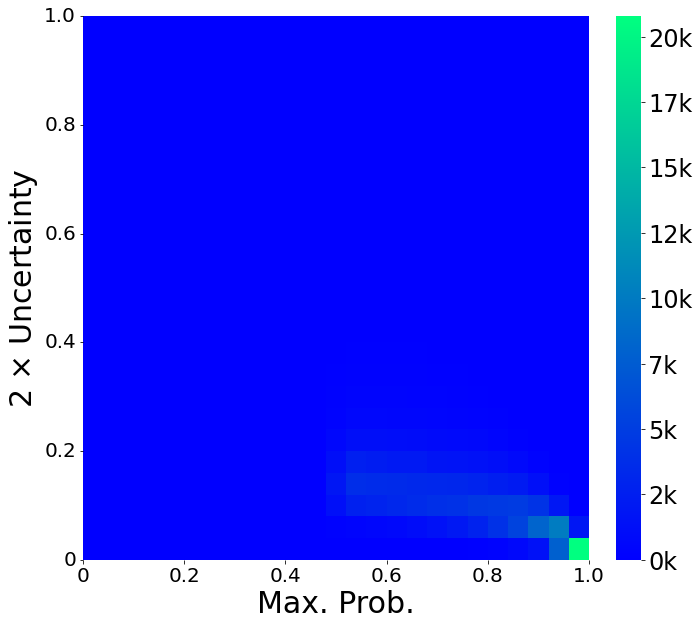

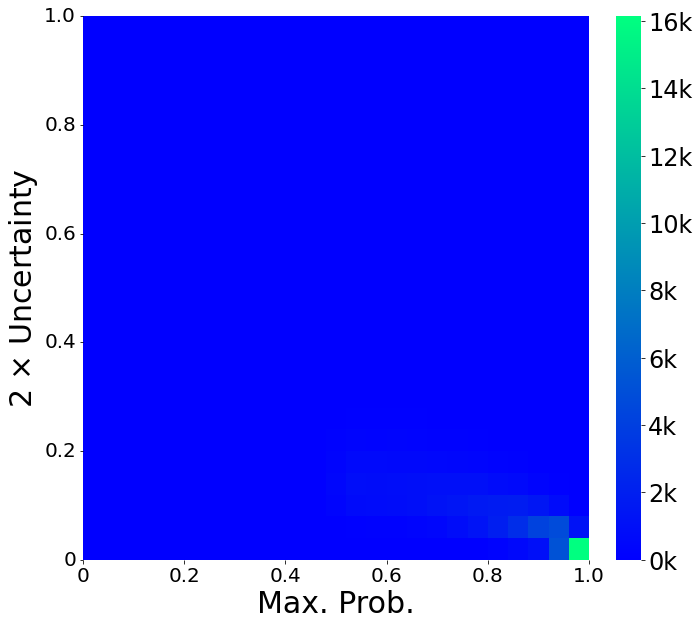

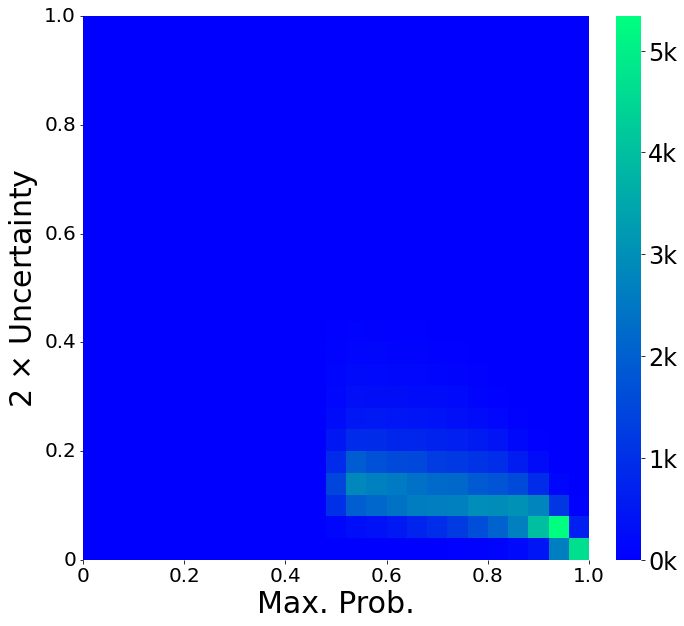

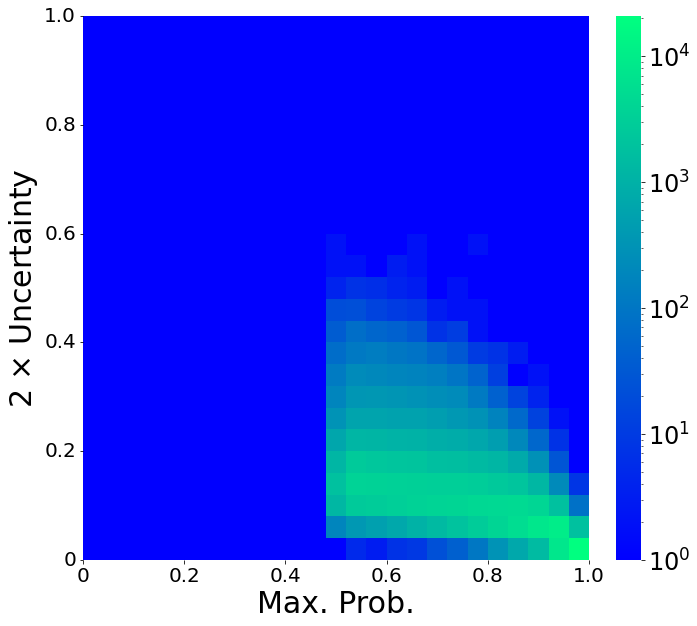

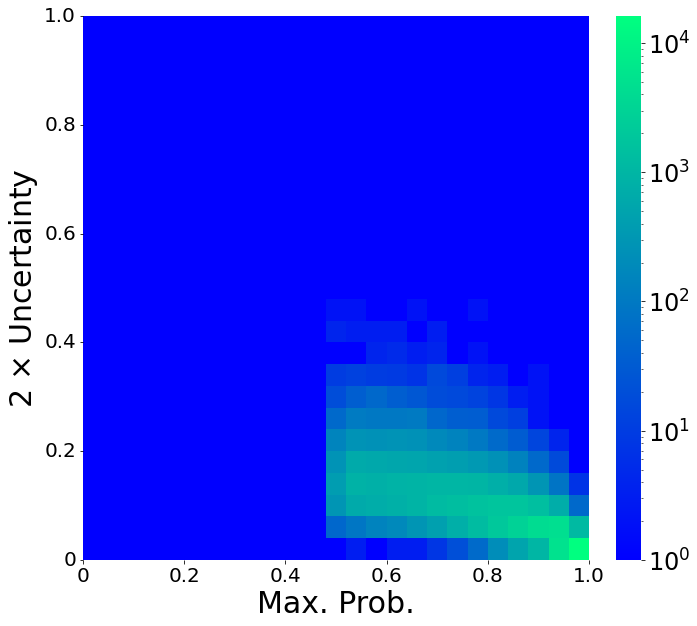

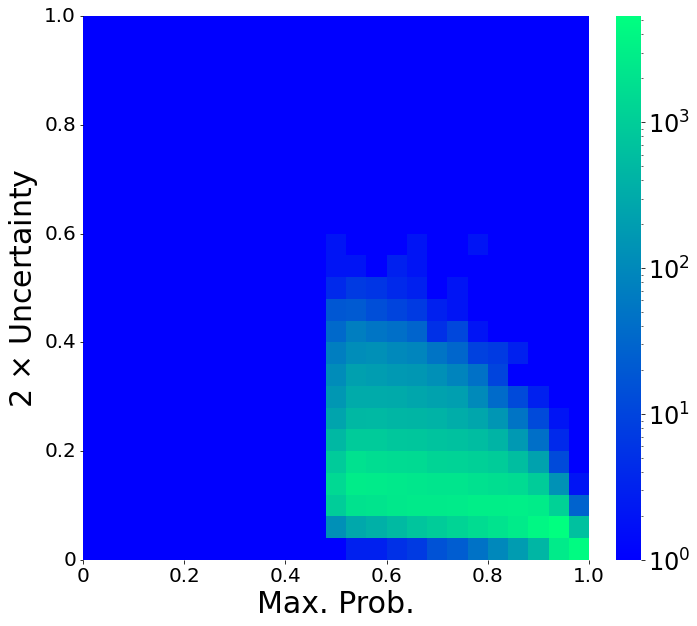

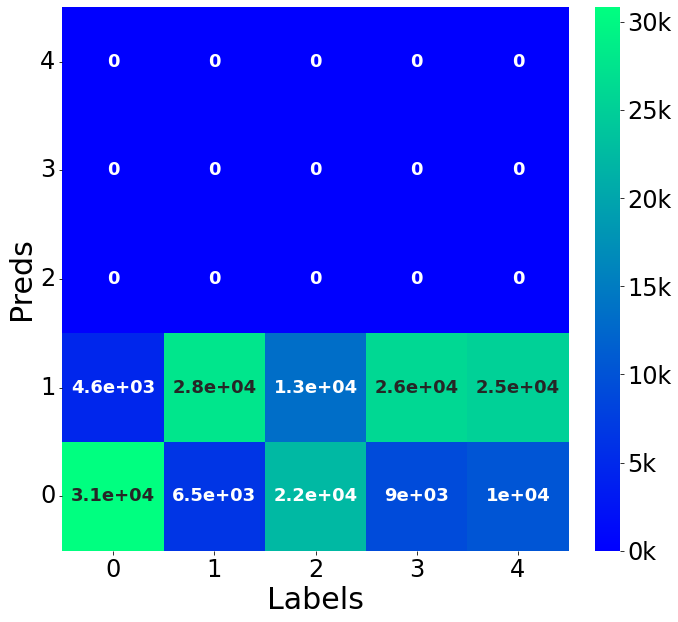

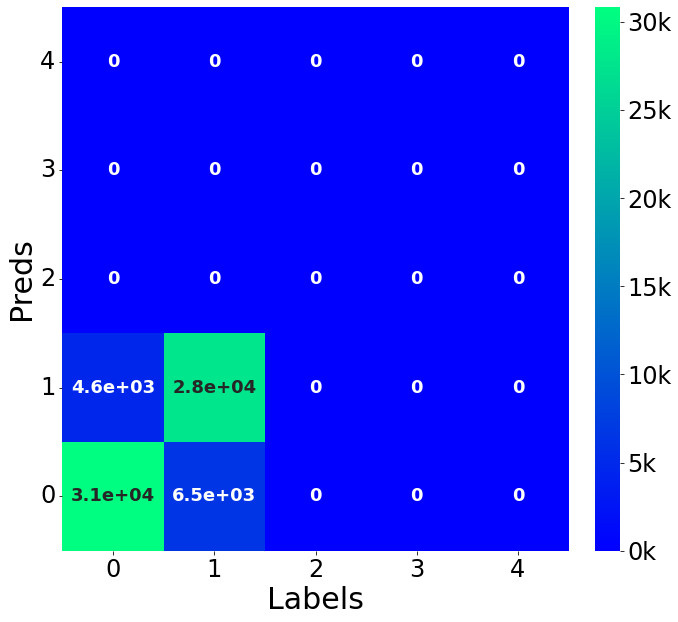

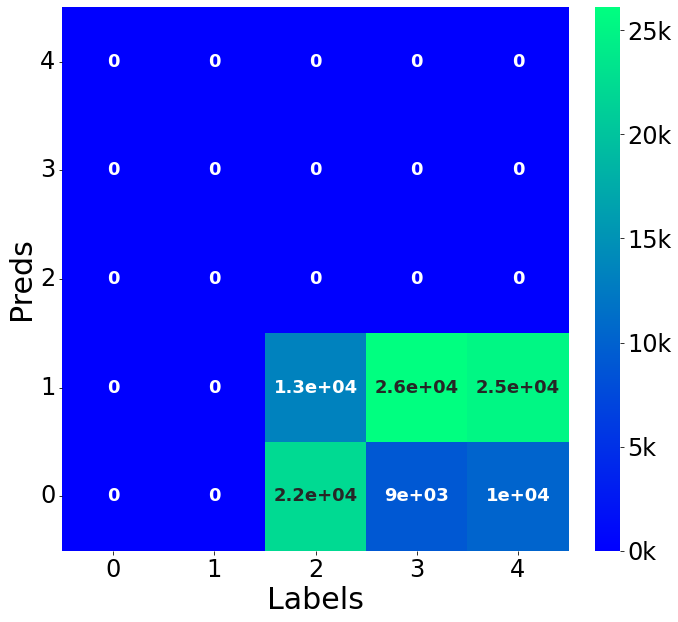

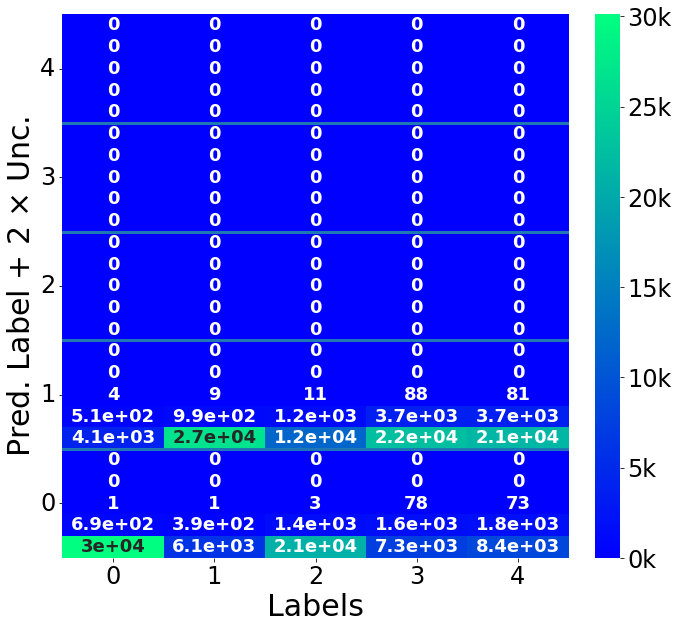

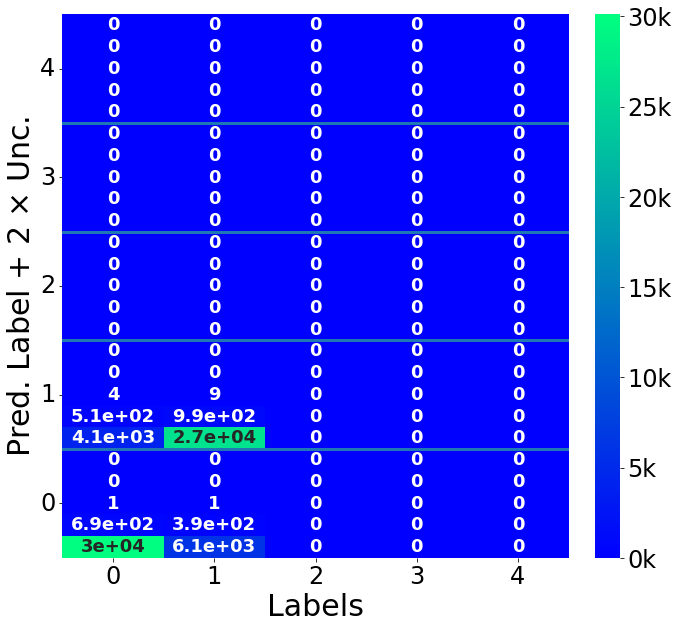

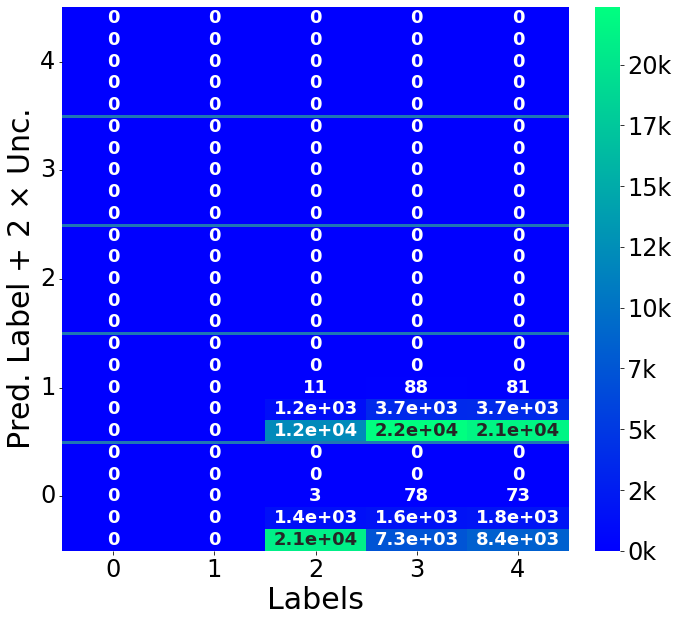

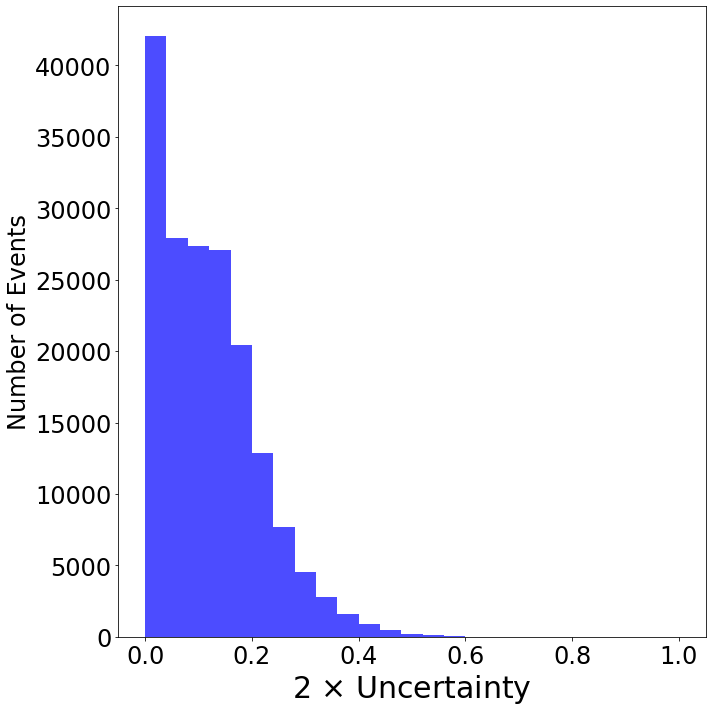

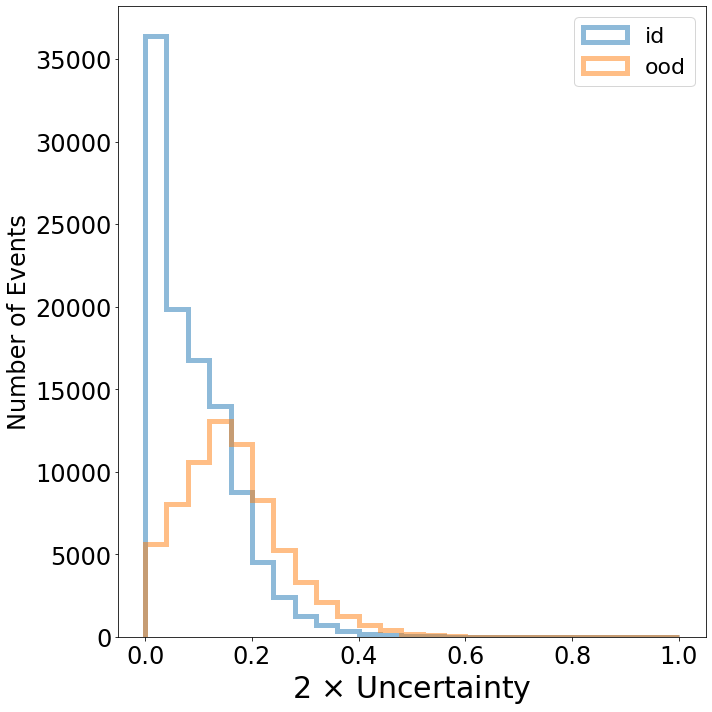

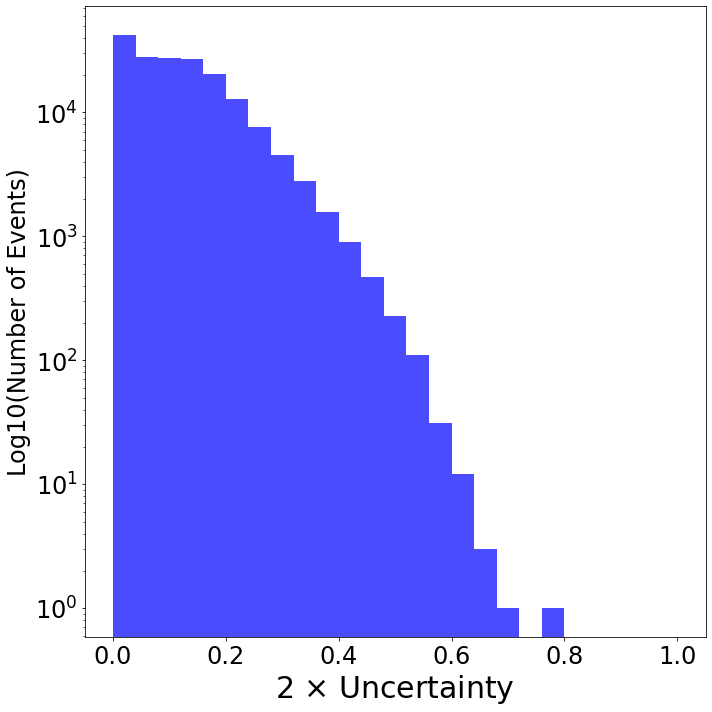

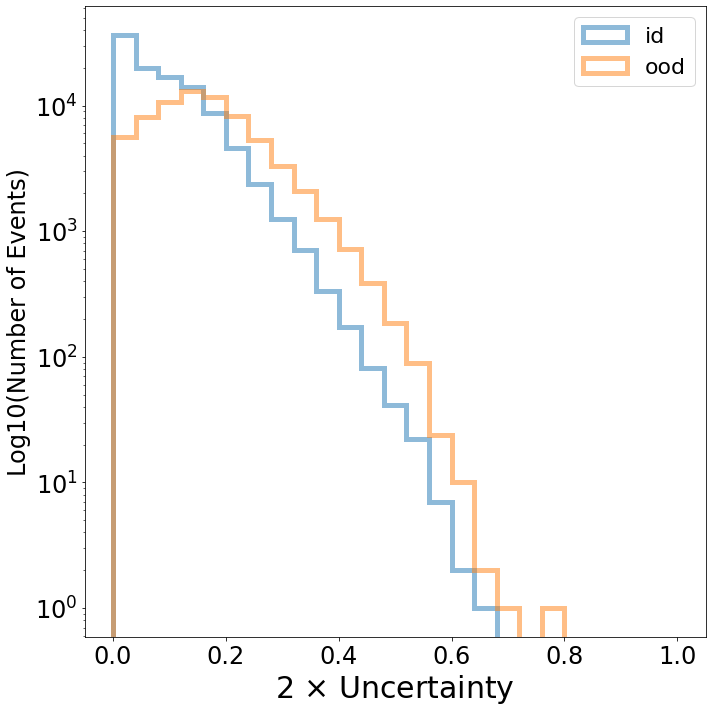

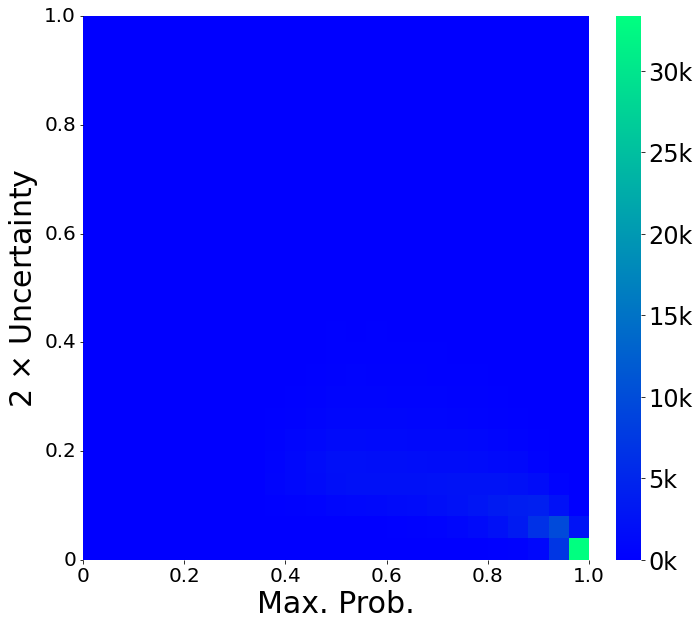

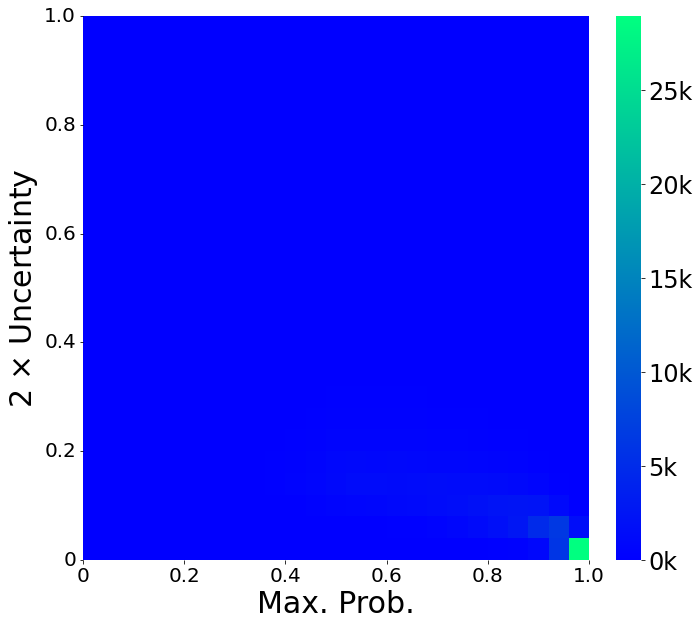

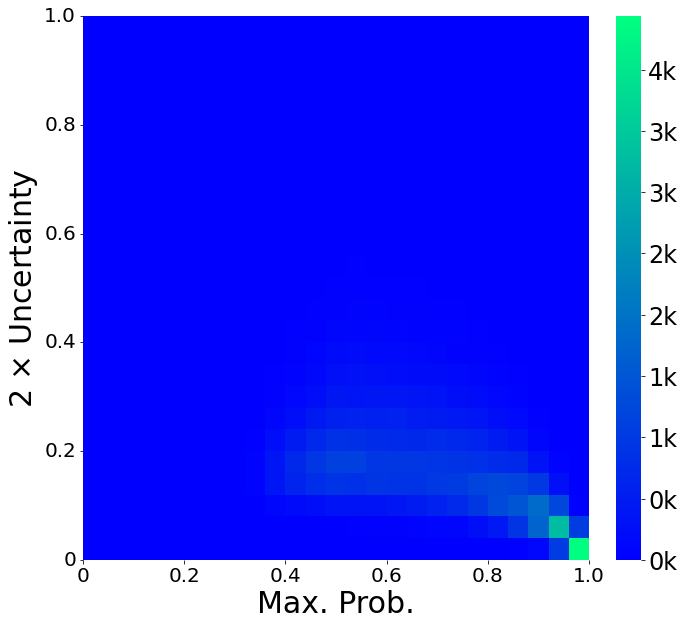

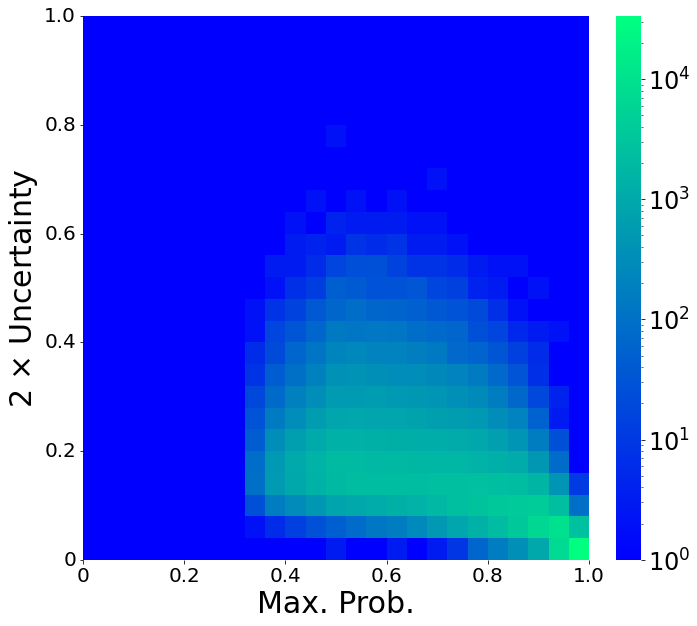

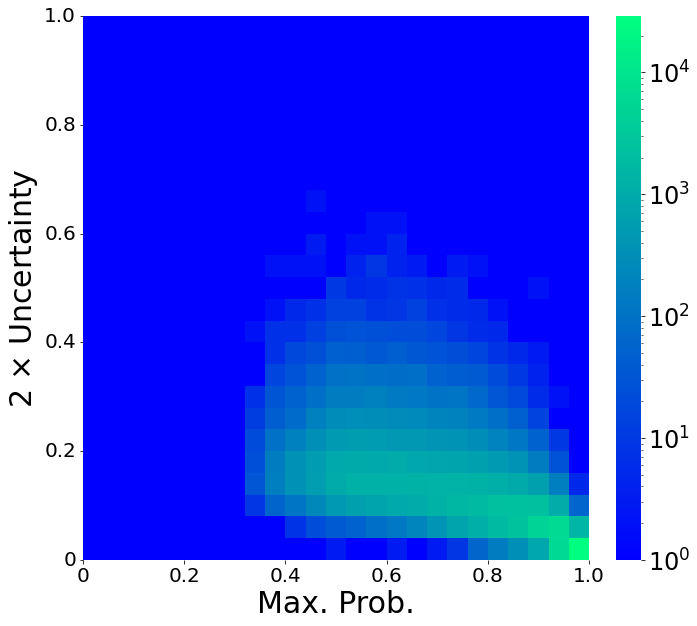

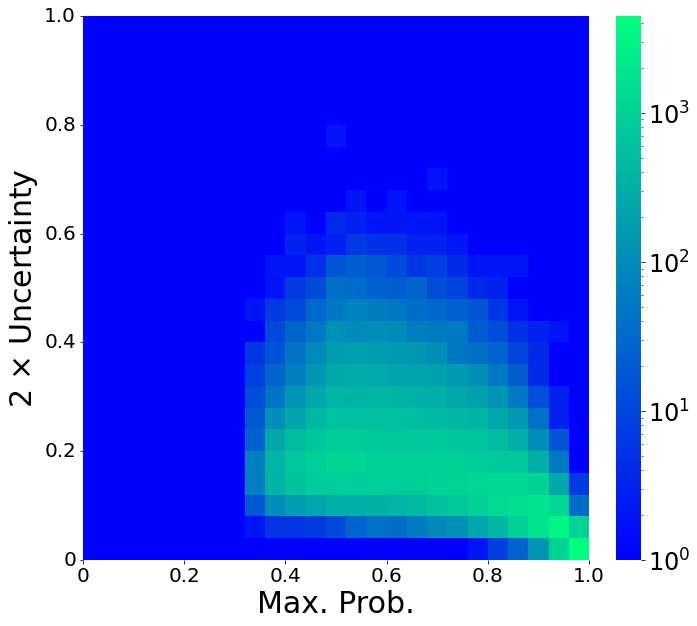

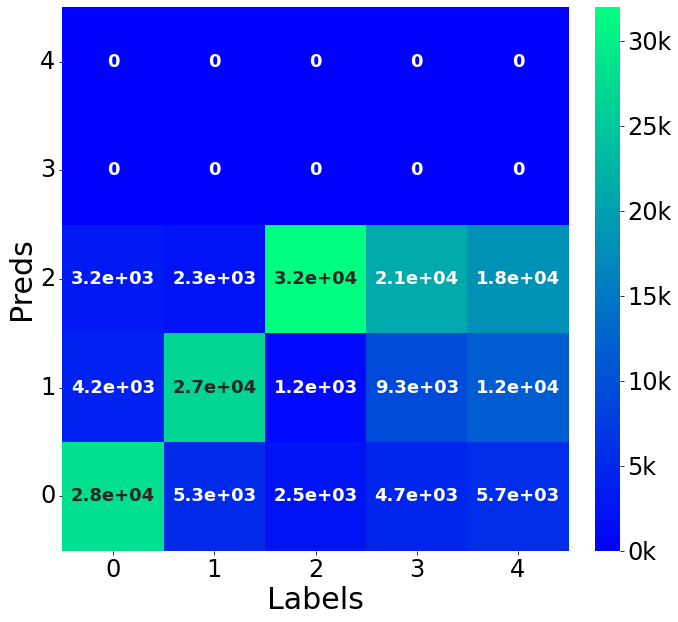

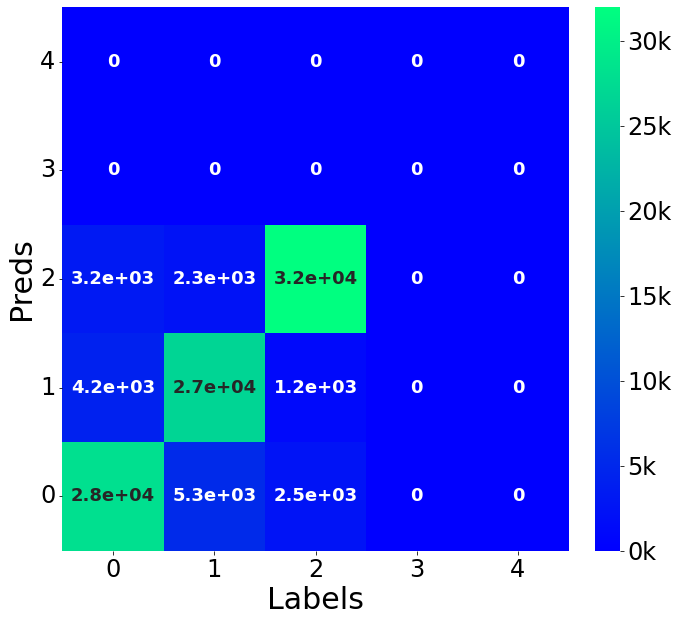

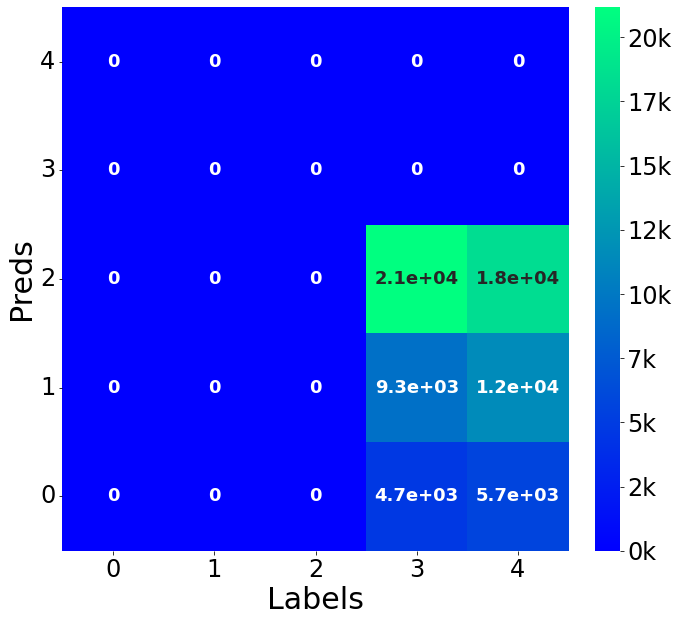

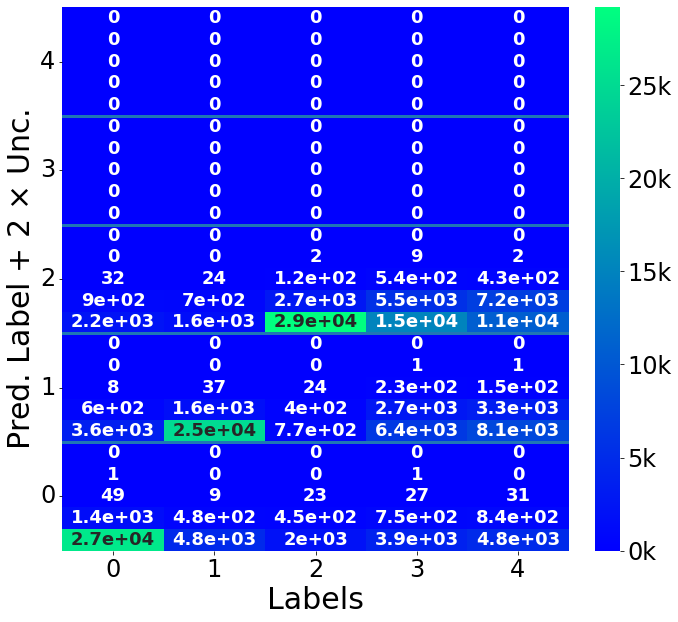

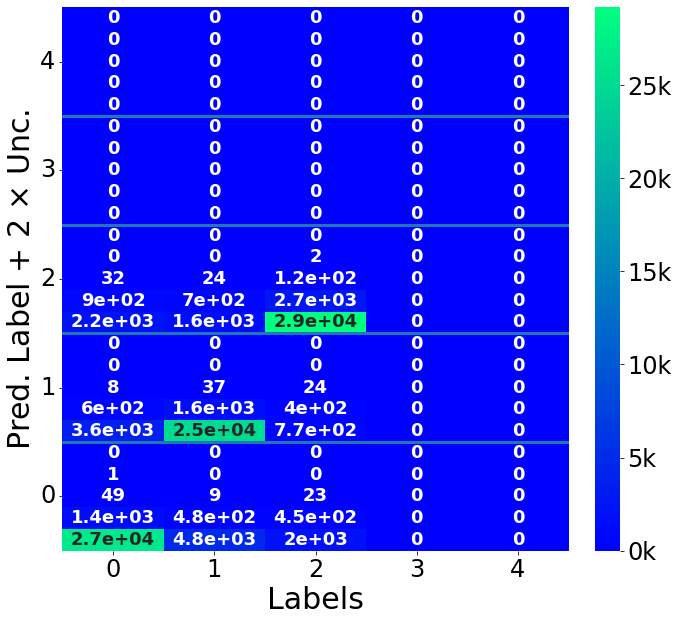

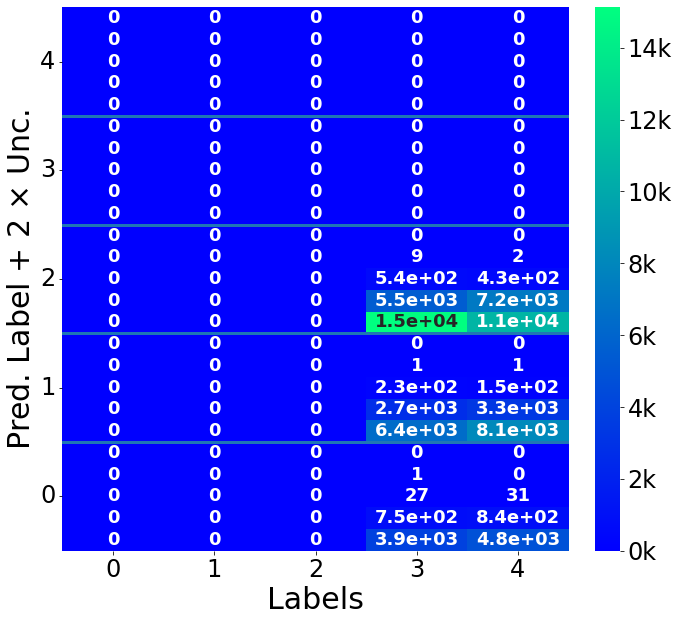

In [4]:
for modelname in result_files:
    key = modelname[15:-3]
    print(key)
    
    if 'slope' in key:
        continue
    
    if "jetnet" in key:
        l_max = 5
        fsize=18
    elif "jetclass" in key:
        l_max = 10
        fsize=10
    elif "JNqgmerged" in key:
        l_max = 4
    else:
        l_max = 2
        fsize=24
        
        
    filename = os.path.join(results_dir, modelname)
    
    f = h5py.File(filename, "r")    
    labels, preds, maxprobs, sums, oods, uncs, probs = f['labels'][:], f['preds'][:], \
                                                f['maxprobs'][:], f['sums'][:], \
                                                f['oods'][:], f['uncs'][:], f['probs'][:]
    f.close()
    
    split = key.split('_')
    coeff = "_".join(split[1:-1])
    high_unc = 0.2

    savefolder = "figures/{}/{}/{}/".format(split[0], split[-1], coeff)
    os.makedirs(savefolder, exist_ok=True)

    if 'baseline' in key:
        f1 = 'correct'
        f2 = 'incorrect'
        oods = labels != preds
    else:
        f1 = 'id'
        f2 = 'ood'


    # for scale in ['', '_log']:
    #     plt.figure(figsize=(10,10))
    #     ax = plt.gca()
    #     ax.hist(uncs[tp], label='TP', bins=np.arange(0.,1.01,0.04), alpha = 0.5, histtype = 'step', linewidth = 5)
    #     ax.hist(uncs[fp], label='FP', bins=np.arange(0.,1.01,0.04), alpha = 0.5, histtype = 'step', linewidth = 5)
    #     ax.hist(uncs[fn], label='FN', bins=np.arange(0.,1.01,0.04), alpha = 0.5, histtype = 'step', linewidth = 5)
    #     ax.hist(uncs[tn], label='TN', bins=np.arange(0.,1.01,0.04), alpha = 0.5, histtype = 'step', linewidth = 5)
    #     ax.set_xlabel('Uncertainty', fontsize=30)
    #     ax.set_ylabel("Number of Events", fontsize = 24)
    #     ax.tick_params(axis='both', which='major', labelsize=24)
    #     if 'jetnet' in key or 'jetclass' in key:
    #         ax.legend(fontsize = 22, loc='upper left')
    #     else:
    #         ax.legend(fontsize = 22)
    #     ax.yaxis.get_offset_text().set_fontsize(24)
    #     plt.tight_layout()
    #     if 'log' in scale:
    #         ax.set_ylabel("Log10(Number of Events)", fontsize = 24)
    #         ax.set_yscale('log')
    #         ax.set_aspect((ax.get_xlim()[1] - ax.get_xlim()[0]) / (np.log10(ax.get_ylim()[1]) - np.log10(ax.get_ylim()[0])))
    #     else:
    #         ax.set_aspect((ax.get_xlim()[1] - ax.get_xlim()[0]) / (ax.get_ylim()[1] - ax.get_ylim()[0]))
    #     plt.savefig("{}/tp_fp_fn_tn_unc{}.pdf".format(savefolder, scale), dpi = 150)
    if "topdata" in key:
        multiple = 3
    elif "jetnet" in key:
        multiple = 2
    elif "jetclass" in key:
        multiple = 2
    uncs = uncs * multiple
    mult_label = str(multiple) + r' $\times$ Unc'


    for types in ['total', 'separate', 'total_log', 'separate_log']:
        # Uncertainty distribution
        plt.figure(figsize=(10,10))
        ax = plt.gca()

        if 'total' in types:
            ax.hist(uncs, bins=np.arange(0.,1.01,0.04), alpha = 0.7, color='blue')
        else:
            ax.hist(uncs[~oods], bins=np.arange(0.,1.01,0.04), label=f1, alpha = 0.5, histtype = 'step', linewidth = 5)
            ax.hist(uncs[oods], bins=np.arange(0.,1.01,0.04), label=f2, alpha = 0.5, histtype = 'step', linewidth = 5)
            ax.legend(fontsize = 22)
        # ax.set_aspect((ax.get_xlim()[1] - ax.get_xlim()[0]) / (ax.get_ylim()[1] - ax.get_ylim()[0]))
        ax.set_xlabel("Uncertainty".replace("Unc", mult_label), fontsize=30)
        ax.set_ylabel("Number of Events", fontsize = 24)
        if 'log' in types:
            ax.set_ylabel("Log10(Number of Events)", fontsize = 24)
            ax.set_yscale('log')
        ax.tick_params(axis='both', which='major', labelsize=24)
        ax.yaxis.get_offset_text().set_fontsize(24)
        plt.tight_layout()
        plt.savefig("{}/unc_{}.pdf".format(savefolder, types), dpi = 150)
        
    
    filetypes = ['total', f1, f2]
    indices = [oods | ~oods, ~oods, oods]

    for filetype, idx in zip(filetypes, indices):
        # Max Prob. vs Uncertainty distribution
        hist, _, _ = np.histogram2d(maxprobs[idx], uncs[idx], bins = [np.arange(0.,1.01,0.04), np.arange(0.,1.01,0.04)])

        fig, ax  = plt.subplots(1, 2, figsize=(10,10), gridspec_kw={'width_ratios':[1,0.05], 'wspace': 0.1})
        heatmap = sns.heatmap(hist.T, annot=False, cmap='winter', ax=ax[0], cbar_ax=ax[1])
        ax[0].invert_yaxis()
        ax[0].set_xlabel("Max. Prob.", fontsize=30)
        ax[0].set_ylabel("Uncertainty".replace("Unc", mult_label), fontsize=30)
        ax[0].set_yticks(np.arange(0, 26, 5))
        ax[0].set_yticklabels([0, 0.2, 0.4, 0.6, 0.8, 1.0], rotation=0)
        ax[0].set_xticks(np.arange(0, 26, 5))
        ax[0].set_xticklabels([0, 0.2, 0.4, 0.6, 0.8, 1.0])
        ax[0].tick_params(axis='both', which='major', labelsize=20)
        cbar = heatmap.collections[0].colorbar
        cbar.ax.tick_params(labelsize=24)
        cbar.ax.yaxis.get_offset_text().set_fontsize(24)
        if 'topdata' in key or 'jetnet' in key:
            tick_values = cbar.get_ticks()
            cbar.set_ticklabels([f'{int(tick / 1000)}k' for tick in tick_values])
        plt.tight_layout()
        plt.savefig("{}/unc_prob_{}.pdf".format(savefolder, filetype), dpi = 150)

    for filetype, idx in zip(filetypes, indices):
        # Max Prob. vs Uncertainty distribution (Log Scale)
        hist, _, _ = np.histogram2d(maxprobs[idx], uncs[idx], bins = [np.arange(0.,1.01,0.04), np.arange(0.,1.01,0.04)])

        fig, ax  = plt.subplots(1, 2, figsize=(10,10), gridspec_kw={'width_ratios':[1,0.05], 'wspace': 0.1})
        heatmap = sns.heatmap(hist.T+1, annot=False, cmap='winter', ax=ax[0], cbar_ax=ax[1], norm=LogNorm())
        ax[0].invert_yaxis()
        ax[0].set_xlabel("Max. Prob.", fontsize=30)
        ax[0].set_ylabel("Uncertainty".replace("Unc", mult_label), fontsize=30)
        ax[0].set_yticks(np.arange(0, 26, 5))
        ax[0].set_yticklabels([0, 0.2, 0.4, 0.6, 0.8, 1.0], rotation=0)
        ax[0].set_xticks(np.arange(0, 26, 5))
        ax[0].set_xticklabels([0, 0.2, 0.4, 0.6, 0.8, 1.0])
        ax[0].tick_params(axis='both', which='major', labelsize=20)
        cbar = heatmap.collections[0].colorbar
        cbar.ax.tick_params(labelsize=24)
        plt.tight_layout()
        plt.savefig("{}/unc_prob_{}_log.pdf".format(savefolder, filetype), dpi = 150)

    for filetype, idx in zip(filetypes, indices):
        # Labels vs Preds
        arr = np.zeros((l_max,l_max))
        for i in range(l_max):
            for j in range(l_max):
                arr[j, i] = np.sum((labels[idx] == i) & (preds[idx] == j))

        fig, ax  = plt.subplots(1, 2, figsize=(10,10), gridspec_kw={'width_ratios':[1,0.05], 'wspace': 0.1})
        heatmap = sns.heatmap(arr, annot=True, cmap='winter', annot_kws={"size": fsize, "weight": "bold"}, ax=ax[0], cbar_ax=ax[1])
        ax[0].invert_yaxis()
        ax[0].set_xlabel("Labels", fontsize=30)
        ax[0].set_ylabel("Preds", fontsize=30)
        ax[0].tick_params(axis='both', which='major', labelsize=24)
        ax[0].tick_params(axis='y', labelrotation=0)
        cbar = heatmap.collections[0].colorbar
        cbar.ax.tick_params(labelsize=24)
        cbar.ax.yaxis.get_offset_text().set_fontsize(24)
        if 'topdata' in key or 'jetnet' in key:
            tick_values = cbar.get_ticks()
            cbar.set_ticklabels([f'{int(tick / 1000)}k' for tick in tick_values])
        plt.tight_layout()
        plt.savefig("{}/labels_preds_{}.pdf".format(savefolder, filetype), dpi = 150)

    for filetype, idx in zip(filetypes, indices):
        # Labels vs Preds + Uncertainty
        uncertainty_bins = np.zeros((5*l_max, l_max))  # 5 bins for uncertainty
        for i in range(l_max):
            for j in range(l_max):
                filtered_indices = (labels[idx] == i) & (preds[idx] == j)
                if np.sum(filtered_indices) > 0:
                    # Create histogram for uncertainty values in 5 bins
                    hist, _ = np.histogram(uncs[idx][filtered_indices], bins=5, range=(0, 1))
                    for k in range(5):
                        uncertainty_bins[5*j+k, i] = hist[k]

        fig, ax  = plt.subplots(1, 2, figsize=(10,10), gridspec_kw={'width_ratios':[1,0.05], 'wspace': 0.1})
        heatmap = sns.heatmap(uncertainty_bins, annot=True, cmap='winter', annot_kws={"size": fsize, "weight": "bold"}, ax=ax[0], cbar_ax=ax[1])
        ax[0].invert_yaxis()
        ax[0].set_xlabel("Labels", fontsize=30)
        ax[0].set_ylabel("Pred. Label + Unc.".replace("Unc", mult_label), fontsize=30)
        for jj in np.arange(5,5*l_max, 5):
            ax[0].axhline(jj, linewidth=3)
        ax[0].set_yticks(np.arange(2.5, 5*l_max+1, 5))
        ax[0].set_yticklabels(np.arange(0, l_max), rotation=0)
        ax[0].tick_params(axis='both', which='major', labelsize=24)
        cbar = heatmap.collections[0].colorbar
        cbar.ax.tick_params(labelsize=24)
        cbar.ax.yaxis.get_offset_text().set_fontsize(24)
        if 'topdata' in key or 'jetnet' in key:
            tick_values = cbar.get_ticks()
            cbar.set_ticklabels([f'{int(tick / 1000)}k' for tick in tick_values])
        plt.tight_layout()
        plt.savefig("{}/labels_preds_unc_{}.pdf".format(savefolder, filetype), dpi = 150)
            
            
        
            

In [44]:
uncs.mean()/5*150

0.04837570711970329

In [56]:
np.percentile(uncs/5, 95)*1400

0.9831675299210465

(array([1.75998e+05, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([2.7877168e-04, 1.0025089e-01, 2.0022301e-01, 3.0019513e-01,
        4.0016726e-01, 5.0013942e-01, 6.0011148e-01, 7.0008361e-01,
        8.0005574e-01, 9.0002787e-01, 1.0000000e+00], dtype=float32),
 <BarContainer object of 10 artists>)

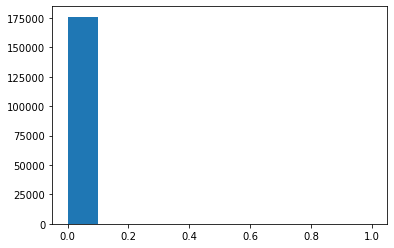

In [6]:
plt.hist(uncs)

In [38]:
uncs.max()

0.030081917